In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/salary-dataset-simple-linear-regression/Salary_dataset.csv


In [80]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

In [8]:
df = pd.read_csv("/kaggle/input/salary-dataset-simple-linear-regression/Salary_dataset.csv")
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [9]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [10]:
df.head()

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [14]:
df.duplicated().any()

False

<Axes: xlabel='YearsExperience', ylabel='Salary'>

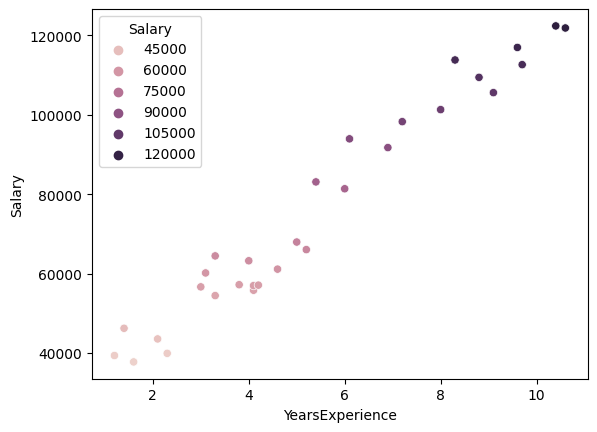

In [19]:
sns.scatterplot(data=df, x='YearsExperience', y='Salary', hue='Salary')

As it can be seen visually that with more no. of years in experience, the salary would be more too.

In [21]:
linearReg = LinearRegression()

In [22]:
X = df['YearsExperience']
Y = df['Salary']

In [23]:
print(f"X shape: {X.shape}")
print(f"Y shape: {Y.shape}")

X shape: (30,)
Y shape: (30,)


In [81]:
scaler = MinMaxScaler()

In [82]:
X_sklearn = np.array(X)
Y_sklearn = np.array(Y)
X_sklearn = X_sklearn.reshape(-1,1)
Y_sklearn = Y_sklearn.reshape(-1,1)
print(f"Shape of new X: {X_sklearn.shape}")
print(f"Shape of new Y: {Y_sklearn.shape}")
X_logged = scaler.fit_transform(X_sklearn)
Y_logged = scaler.fit_transform(Y_sklearn)

Shape of new X: (30, 1)
Shape of new Y: (30, 1)


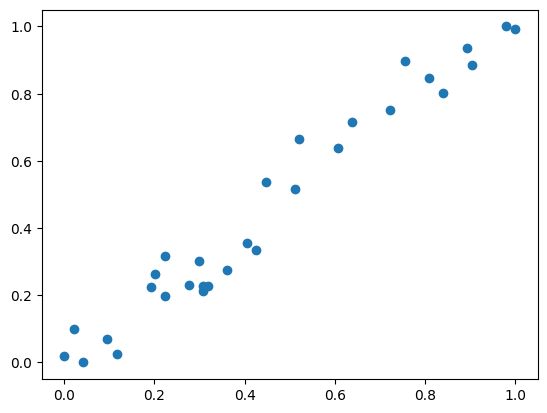

In [89]:
plt.scatter(X_logged, Y_logged, marker='o')

Fitting the linear regression line

# Training

In [34]:
linearReg.fit(X_sklearn, Y_sklearn)

LinearRegression()

In [35]:
beta0, beta1 = linearReg.coef_, linearReg.intercept_
print(f"Slope = {beta0}")
print(f"Intercept = {beta1}")

Slope = [[9449.96232146]]
Intercept = [24848.20396652]


# Prediction

In [58]:
new_x_data = np.array(1.2)
new_x_data = new_x_data.reshape(-1,1)
predicted = linearReg.predict(new_x_data)
print(f"Predicted Salary = {str(predicted).strip('[]')}")

Predicted Salary = 36188.15875227


In [61]:
Y_predicted = linearReg.predict(X_sklearn)

In [64]:
Y_predicted = pd.DataFrame(Y_predicted)
Y_predicted.rename(columns={0:'Predicted_Salary'}, inplace=True)
Y_predicted.head()

,Predicted_Salary
0,36188.158752
1,38078.151217
2,39968.143681
3,44693.124842
4,46583.117306


In [74]:
df = pd.concat([df.reset_index(drop=True), Y_predicted], axis=1)
df.head()

,YearsExperience,Salary,Predicted_Salary
0,1.2,39344.0,36188.158752
1,1.4,46206.0,38078.151217
2,1.6,37732.0,39968.143681
3,2.1,43526.0,44693.124842
4,2.3,39892.0,46583.117306


<function matplotlib.pyplot.show(close=None, block=None)>

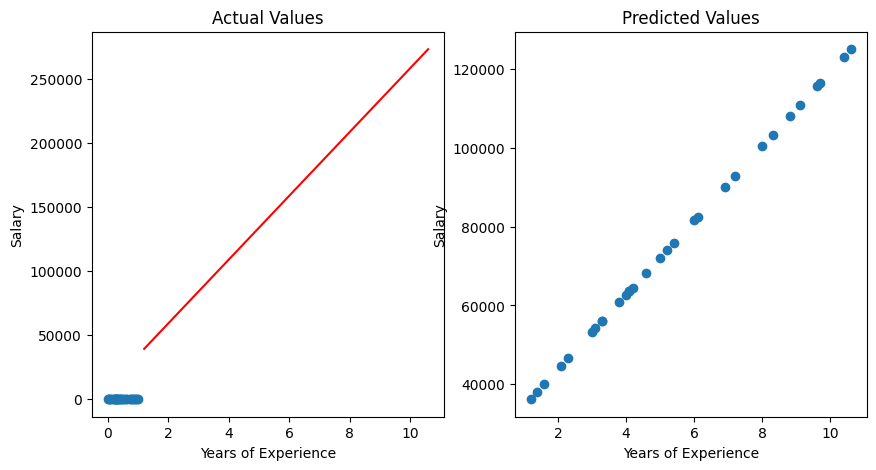

In [83]:
fig, (actual, predicted) = plt.subplots(1, 2, figsize=(10,5))

actual.plot(X_logged, Y_logged, 'o')
actual.plot(X_sklearn, beta1*X_sklearn + beta0, color='red')
predicted.plot(X_sklearn, Y_predicted, 'o')

actual.set(title='Actual Values', xlabel='Years of Experience', ylabel='Salary')
predicted.set(title='Predicted Values', xlabel='Years of Experience', ylabel='Salary')

plt.show

In [54]:
loss_function = np.sum((Y_predicted - Y_sklearn) ** 2)
loss_function

938128551.6684285

## Prediction function

In [75]:
def pred(X, linearReg):
    X_2d = X.reshape(-1,1)
    Y = linearReg.predict(X_2d)
    return Y

In [77]:
new_data_points = np.array([3, 10, 12, 4.2])
print(f"Test data: \n{new_data_points}")
print(f"Predicted values: \n{pred(new_data_points, linearReg).T}")

Test data: 
[ 3.  10.  12.   4.2]
Predicted values: 
[[ 53198.09093089 119347.82718107 138247.75182398  64538.04571663]]
